<a href="https://colab.research.google.com/github/Rafael-Salomao/Deteccao_de_Fraude_em_Cartoes_de_Credito/blob/main/Deteccao_de_Fraude_em_Cartoes_de_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, de acordo com o Serasa Experian, no ano de 2021 foram registradas 4,1 milhões de movimentações suspeitas de fraudes, no Braisil. Sendo que, esse número mostra um aumento de 16,8% em relação ao acumulado de 2020.

<p align=center>
<img src="https://img.freepik.com/free-photo/magnifier-with-fraud-message_23-2148543167.jpg?w=740&t=st=1658188855~exp=1658189455~hmac=549682bfb5a290a48961ccae7d13ef401ce3f3d5a84c1334ca6522c05ce01960" width="60%"></p>

Dentre essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância, uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Além disso, um outro fator a ser considerado é a quantidade de falsos positivos - considerados por certas instituições financeiras -, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento. Tal situação ocorre como forma de prevenção, estruturados nos modelos, para a lista de clinetes em que o modelo de classificação não tem certeza se será fraudulento ou não. 

Levando esses pontos em consideração, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor - com maior nível de acurácia - que os anteriores, já pode representar uma economia de milhões de Reais. Portanto, esse é o objetivo do presente projeto, aprimorar o uso de algoritmos visando inibir ou evitar transações fraudulentas.


## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://static.globalnoticias.pt/dv/image.jpg?brand=DV&type=generate&guid=25a45b57-91b1-4d86-8ef4-dafb534032ce&w=800&h=450&t=20210701112537" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
# ignorar mensagens de erro
from warnings import simplefilter
simplefilter(action='ignore');

# instalar biblioteca scikit plot
!pip install -q scikit-plot;

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

%matplotlib inline 

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

# dimensões das divisões do dataset
print('- Dimensão dataset completo: {}'.format(df.shape))

- Dimensão dataset completo: (284807, 31)


Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Feito isso, vamos à Análise Exploratória.

## Análise Exploratória

A partir da visualização das cinco primeiras linhas do Dataset, é possível notar as features V1, V2, … V28 são os principais componentes obtidos com PCA. As únicas features que não foram transformadas com PCA são `Tempo` e `Valor`. 

A variável `Tempo` contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. Enquanto `Valor` é o valor da transação e, `Class` é o conjunto de resposta e assume valor 1 em caso de fraude e 0 caso contrário.

In [ ]:
# Ver as 5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


A fim de se obter um melhor visualização dos elementos estatísticos de cada variável, é utilizado o método `describe()`.

Assim, é possível observar um possível comportamento de outliers na variável `Amount`, uma vez que sua média é maior que o valor encontrado no terceiro quartil do conjunto. 

O terceiro quartil é o valor que delimita os 25% maiores valores. Sendo assim, em um conjunto balanceado e sem outliers, a média deveria corresponder, aproximadamente, ao valor que delimita o segundo quartil (50%).

Além disso, nota-se que o dataset não possui valores nulos ou inválidos.

In [ ]:
# Ver o resumo estatístico do dataframe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Verificar se há valores ausentes
df.isnull().sum().max()

0

Por se tratar de um dataset de detecção de fraude em cartões de créditos, espera-se que a frequência de entradas `normais` seja maior que a de `fraudulentas`. Por isso, é necessário avaliar o balanceamento da base de dados. A avaliação é feita a partir da comparação da repetição cada status de crédito identificado.

A visualização dos dados deixa nitido o grande desbalanceamento na variável `Class`, conforme previsto. Sendo que, as entradas `fraudulentas` correspondem à 0,17% de todo o dataset.

0    284315
1       492
Name: Class, dtype: int64

Entradas fraudulentas correspondem à 0.17% do dataset.



[]

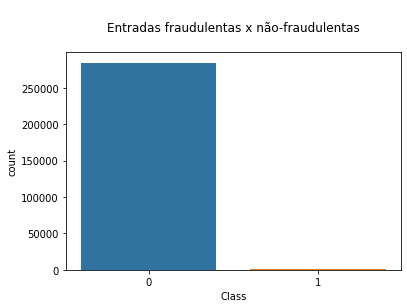

In [ ]:
# Checar o balanceamento do dataset
print(df.Class.value_counts())
print('\nEntradas fraudulentas correspondem à {:.2%} do dataset.\n'.format((df.Class.value_counts()[1]/df.Class.shape[0])))

# Plotar um countplot do balanceamento
fig, ax = plt.subplots()
sns.countplot('Class',data = df, ax = ax)
ax.set_title('\nEntradas fraudulentas x não-fraudulentas\n')
plt.plot()

Dando sequência à análise exploratória, é feito o plot dos histogramas referentes às diferentes classes com relação ao tempo das transações.

No entanto, com a visualização dos gráficos gerados, não é possível tirar conclusões ou elaborar hipóteses relevantes suficiente, que vão de encontro com o objetivo deste projeto. 

Além disso, também foi plotado a relação entre as duas classes e o conjunto `Amount`. O resultado foram dois gráficos bem similares, que não nos traz insights notáveis, apenas o fato de que a supremacia das transações foram realizadas com valores relativamente baixos.

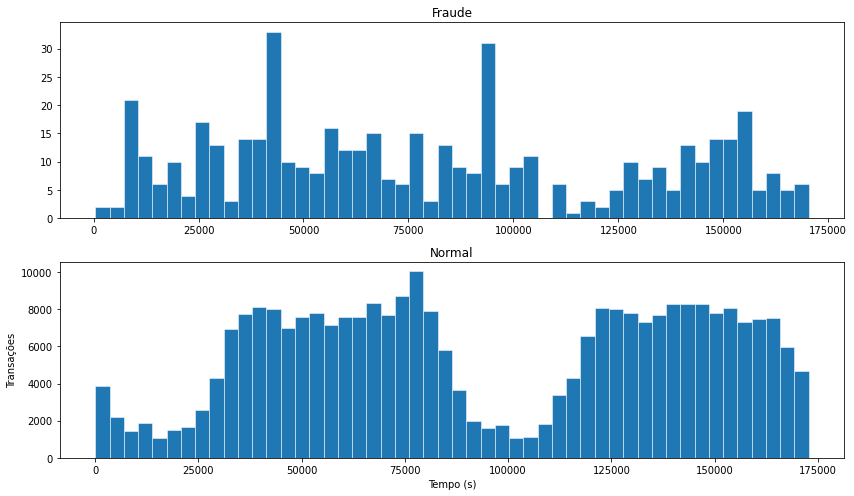

In [ ]:
# Plotar histogramas:
# *Variável 'Time'
nbins = 50

# *Fraude ('Class == 1')
fig, ax = plt.subplots(nrows = 2, ncols=1, figsize = ((12,7)))
ax[0].hist('Time',data = df.loc[df['Class'] == 1], bins = nbins, linewidth=0.5, edgecolor="white")
ax[0].set_title('Fraude')

# *Normal ('Class == 0')
ax[1].hist('Time',data = df.loc[df['Class'] == 0], bins = nbins, linewidth=0.5, edgecolor="white")
ax[1].set_title('Normal')

ax[1].set_xlabel('Tempo (s)')
ax[1].set_ylabel('Transações')
plt.tight_layout()

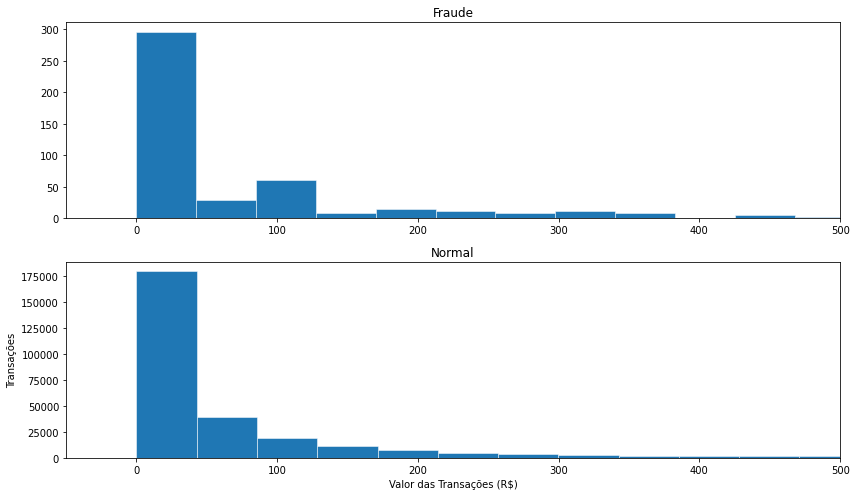

In [ ]:
# *Variável 'Amount'
nbins = 50

# *Fraude ('Class == 1')
fig, ax = plt.subplots(nrows = 2, ncols=1, figsize = ((12,7)))
ax[0].hist('Amount',data = df.loc[df['Class'] == 1], bins = nbins, linewidth=0.5, edgecolor="white")
ax[0].set_title('Fraude')
ax[0].set_xlim(xmin=-50,xmax=500)


# *Normal ('Class == 0')
ax[1].hist('Amount',data = df.loc[df['Class'] == 0], bins = 12*nbins, linewidth=0.5, edgecolor="white")
ax[1].set_title('Normal')
ax[1].set_xlim(xmin=-50,xmax=500)

ax[1].set_xlabel('Valor das Transações (R$)')
ax[1].set_ylabel('Transações')
plt.tight_layout()

Ao plotar o Box Plot para os valores das diferentes classes, é possível verificar um deslocamento considerável do eixo da mediana em ambas categorias. Sendo que, ao enfatizar a classe de transações com fraude, o deslocamento da mediana é mais acentuado, o que indica - e reafirma - a maior frequência de transações de valores baixos.

Além disso, os gráficos sinalizam a ocorrência de outliers para as duas situações análisadas.

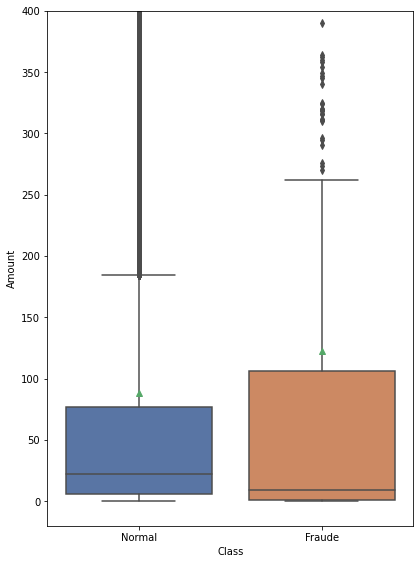

In [ ]:
# Plotar um 'boxplot' para a variável 'Amount' quando houve fraude ou não.
fig, ax = plt.subplots(figsize=(6,8))

sns.set_theme(style="whitegrid")
sns.boxplot(x = 'Class', y = 'Amount', showmeans=True, data = df)
plt.ylim((-20,400))
plt.xticks([0, 1], ['Normal', 'Fraude'])
plt.tight_layout()

In [ ]:
# Encontrar a média e a mediana das transações fraudulentas.

print('A média do valores das transações fraudulentas é de: ${:.4}'.format(df.loc[df['Class'] == 1, 'Amount'].mean()))
print('A mediana do valores das transações fraudulentas é de: ${:.4}'.format(df.loc[df['Class'] == 1, 'Amount'].median()))

A média do valores das transações fraudulentas é de: $122.2
A mediana do valores das transações fraudulentas é de: $9.25


Após verificar a distribuição dos valores com relação ao `Amount`, é interessante ter um panorama geral sobre o comportamento das outras variáveis. Para isso, foram plotados gráficos de distribuição das entradas para cada uma das variáveis. Considera-se os valores em azul como sendo os encontrados para as transações fraudulentas e em vermelho, as normais.

É possível identificar comportamentos que não seguem os mesmos padrões entre as classes como, por exemplo, ao visualizar os gráficos das features `V3`, `V4` e `V11`. Neles, as distribuições encontradas se concentram em valores distintos - entre transações com fraudes e normais -, sendo essas, possíveis evidências para distinguir ou não situações suspeitas.

Por outro lado, pode-se também constatar disposições similares, como são os casos dos esquemas `V13`, `V15` e `V22`. Nesses eventos se trata, possivelmente, de procedimentos ou ocasiões padrões em uma transação bancária.

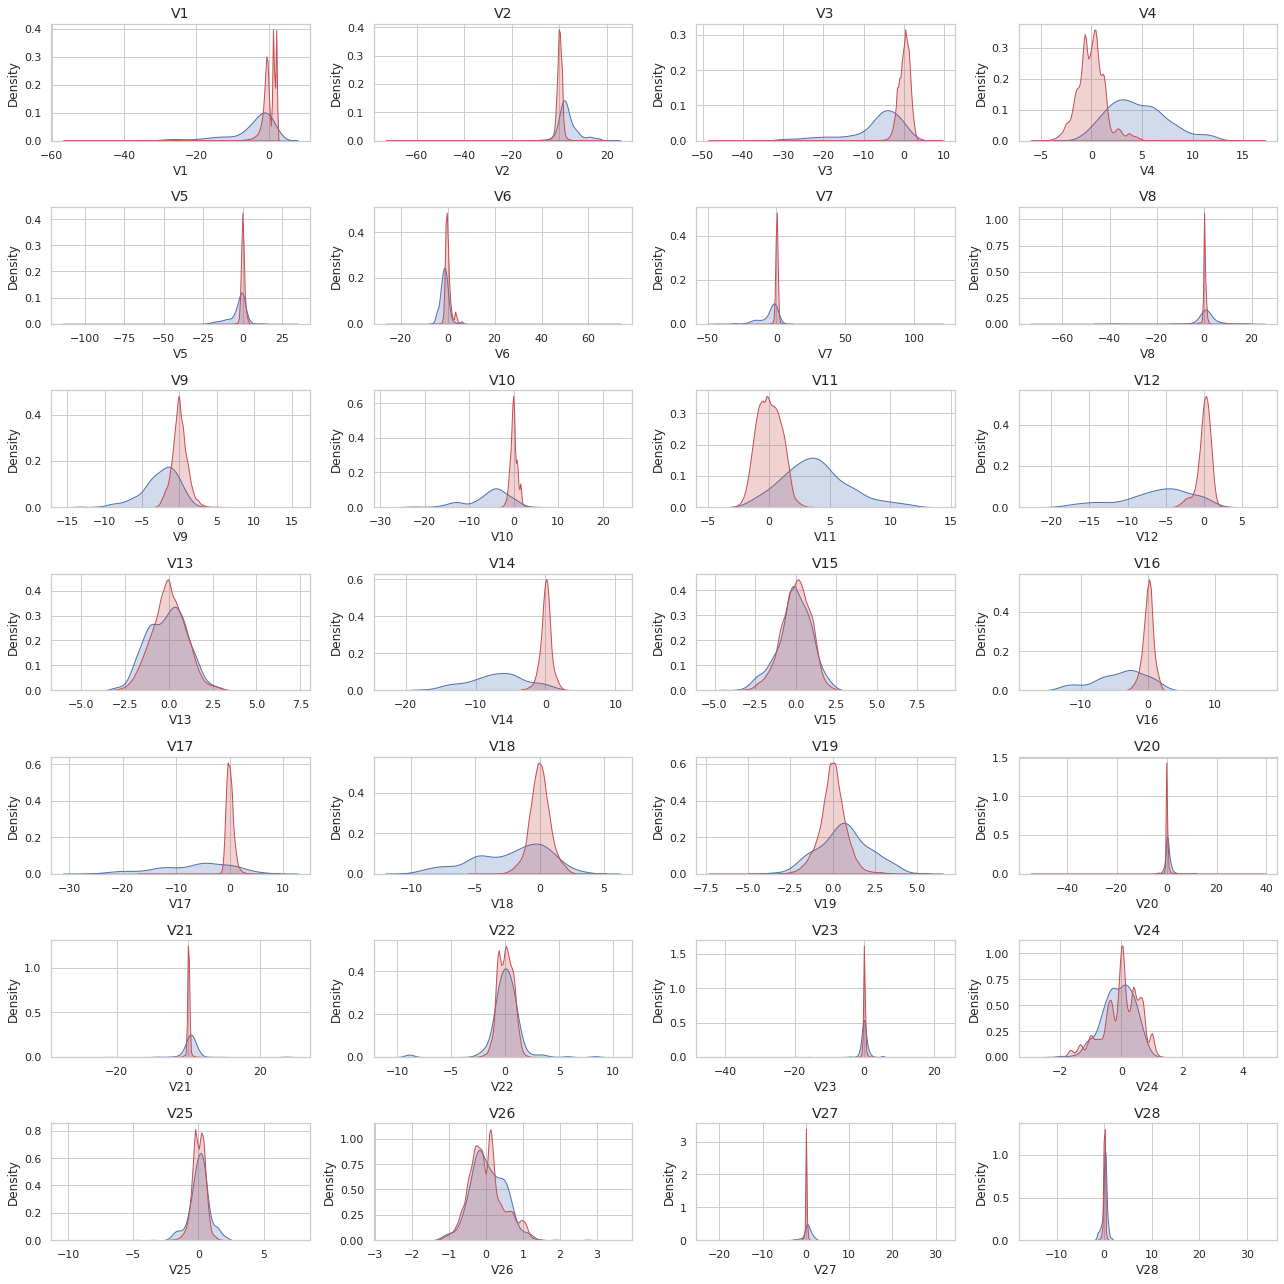

In [ ]:
# Selecionar as colunas a serem plotadas.
column_names = df.drop(df[['Time','Amount','Class']], axis=1).columns

# Segregar as entradas fraudulentas e não-fraudulentas.
df_fraude = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

# Plotar os gráficos de cada variável, considerando entradas fraudulentas e não-fraudulentas.
fig, ax = plt.subplots(nrows=7,ncols=4,figsize=((18,18)))

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_fraude[col], shade=True, color="b")
    sns.kdeplot(df_normal[col], shade=True, color="r")
    plt.title(col, fontsize=14)
plt.tight_layout()

## Preparação dos Dados

####**Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`).**

Como visto no início da análise exploratória, as variáveis `Time` e `Amount` não foram tratadas pelo método PCA, como as demais colunas - com excessão da `Class`. Com o intuito de melhorar o desempenho da representação de classificação a ser executado posteriormente, iremos padronizar as variáveis mencionadas anteriormente. 

A normalização é um pré-processamento comum em modelos de machine learning implementado no [Scikit-Learn](https://medium.com/@rafael.salomaod96/introdu%C3%A7%C3%A3o-ao-scikit-learn-o-que-voc%C3%AA-precisa-saber-para-come%C3%A7ar-2b4d967257aa). Os estimadores podem se comportar mal se os elementos de entrada não se comportarem como uma distribuição Gaussiana. Ou seja, com média igual a zero e variância igual a um.

Com isso, é aplicado o método `StandardScaler()`, de modo a adequar as variáveis `Time` e `Amount` com valores adequados para melhorar o desempenho do modelo. Em seguida, é possível visualizar as cinco primeiras linhas do dataset, com os valores das colunas mencionadas, após o tratamento.

In [ ]:
# Normalizar os dados
df_clean = df.copy()

std = StandardScaler().fit_transform(df_clean[['Time','Amount']])
df_clean['std_Time'] = std[:,0]
df_clean['std_Amount'] = std[:,1]
df_clean.drop(df[['Time', 'Amount']], axis = 1, inplace = True)
df_clean.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_Time,std_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


####**Dividir o conjunto de dados entre treino e validação.**

Após a padronização do restante das variáveis - com excessão da `Class`, variável de resposta para a predição desejada -, é realizado a separação dos dados de treino e teste. Dividir o conjunto de dados é essencial para uma avaliação imparcial do desempenho da previsão. 

O método utilizado é o `train_test_split`, sendo que, são empregados dois parâmetros da documentação, visando adequar ao nosso dataset e obter um melhor desempenho: `shuffle` e `stratify`.

- O parâmetro `shuffle` é definido como `true`, portanto, o conjunto de dados será embaralhado aleatoriamente antes da divisão.

- O parâmetro `stratify` foi adicionado recentemente ao Scikit-Learn, é essencial ao lidar com conjuntos de dados desequilibrados, como no presente projeto. É feito uma divisão para que a proporção de cada um dos valores binários seja igual nos conjuntos de teste e treino. Por exemplo, a variável `Class` sendo uma variável categórica binária com valores 0 e 1 e houver 10% de uns e 90% de zeros, `stratify`=y garantirá que sua divisão aleatória tenha 10% de 1's e 90% de 0's.

In [ ]:
# Preparar variáveis X e y
X = df_clean.drop('Class', axis = 1)
y = df_clean.Class

# Separar dados de teste e de treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

####**Balancear o conjunto de dados.**

Uma das etapas da análise exploratória foi a visualização da proporção de transações classificadas como fraudulentas e as transações ditas normais. Foi possível observar um grande desbalanceamento nos valores do dataset, visto que apenas 0,17% das entradas representam transações com fraudes. Tendo isso é vista, é preciso realizar um balanceamento da informações para encontrar resultados satisfatórios no modelo de machine learning a ser elaborado.

Para dar sequencia no balanceamento desejado, é utilizado o método `RandomUnderSampler()`. Este método minimiza as discrepâncias presentes por meio da reamostragem. Para este caso, é utilizado o parâmetro `Under-Sampling`, focado na classe majoritária. Tal parâmetro elimina aleatoriamente entradas das classes com maior número de ocorrências.

Deste modo, o dataset se encontra balanceado, ou seja, com as mesmas quantidades de entradas fraudulentas e normais. Após o balanceamento, é plotado um gráfico de calor, para ratificar a importância desta etapa. É evidente a diferença entre a correlação dos valores atuais e não balanceados. Sendo, os valores balanceados mais adequados para um melhor desempenho do modelo de classificação.

0    402
1    402
Name: Class, dtype: int64

Entradas fraudulentas correspondem à 50.00% do dataset.



[]

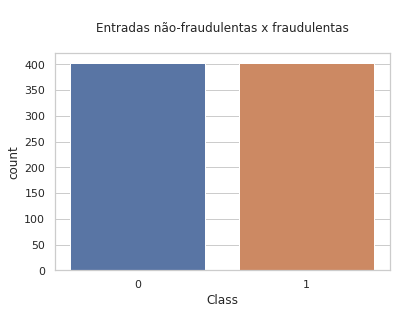

In [ ]:
# Balancear o conjunto de dados
from imblearn.under_sampling import RandomUnderSampler

# Aplicar under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Checar o balanceamento do *dataset*
print(y_rus.value_counts())
print('\nEntradas fraudulentas correspondem à {:.2%} do dataset.\n'.format((y_rus.value_counts()[1]/y_rus.shape[0])))

# Plotar um countplot do balanceamento
fig, ax = plt.subplots()
sns.countplot(y_rus, ax=ax)
ax.set_title('\nEntradas não-fraudulentas x fraudulentas\n')
plt.plot()

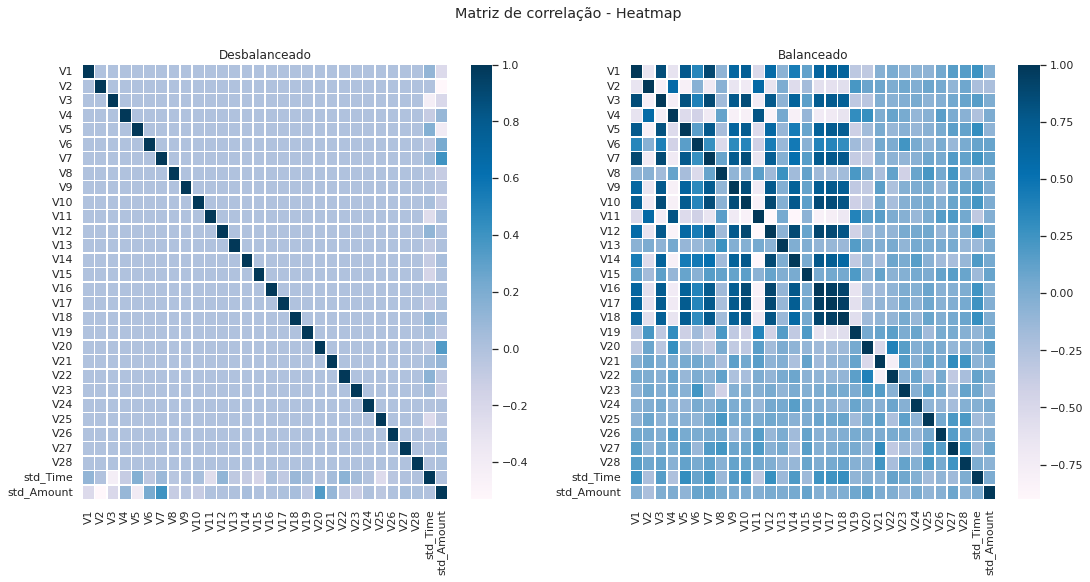

In [ ]:
# Plotar uma matriz de correlação
df_corr = df_clean.drop(['Class'], axis=1).corr()
X_rus_corr = X_rus.corr()

fig, ax = plt.subplots(nrows=1,ncols=2,figsize = (18,8))

fig.suptitle('Matriz de correlação - Heatmap')

sns.heatmap(df_corr, linewidths=.5, cmap="PuBu", xticklabels=1, yticklabels=1,ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(X_rus_corr, linewidths=.5, cmap="PuBu", xticklabels=1, yticklabels=1,ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

## Modelo de Machine Learning

Após o tratamento do dataset, finalmente é tempo de aplicar o modelo de machine learning. Para este projeto, como já mencionado, será aplicado um modelo de Regressão Logística. O modelo leva em consideração análises estatísticas e as relações entre diferentes features e, com isso, determina a probabilidade de um evento acontecer - para fazer as previsões. 

Para o presente artigo, é utilizado a Regressão Logística Binária, na qual há apenas dois resultados possíveis para a resposta categórica - visto que o objetivo é identificar se uma transação é fraudulenta ou normal.

Sendo assim, a representação da `LogisticRegression()` é aplicada e os dados encontrados após o balanceamento - `X_rus` e `y_rus` - são colocados como dados de treinamento da classificação.


In [ ]:
# Escolhar o modelo de classificação
model = LogisticRegression()
model.fit(X_rus, y_rus)

y_proba = model.predict_proba(X_test)[::,1]
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)
print(y_proba)

[0 0 0 ... 0 0 0]
[3.54960752e-03 5.73403587e-02 8.89842854e-02 ... 1.48277125e-02
 8.42813383e-05 4.51076949e-02]


## Avaliar o desempenho do modelo

A partir da aplicação do método de classificação, é possível verificar que o modelo executado tem uma acurácia de 96%. No entanto, pelo fato de estarmos tratando de dados desbalanceados, a acurácia não é um parâmetro confiável para medir o desempenho. O modelo pode ter acertado a maioria esmagadora das transações negativas, ao menos tempo que acerta apenas uma fração das fraudes - mesmo assim segue com uma boa acurácia pelo fato de a quantidade de transações normais corresponderem à quase todo o dataset.

Entretanto, iremos verificar a métrica AUC ROC, que mostra a relação entre a taxa de verdadeiros positivos - true positive rate (TPR): quantidade de fraudes que o modelo acertou - e a taxa de falsos positivos - false positive rate (FPR): quantidade que o modelo diz ser normal, mas é fraude. Esta avaliação indica que um modelo bom é aquele que define um score que maximiza a TPR ao mesmo tempo que minimiza a FPR. Ou seja, quanto mais próximo de 100%, melhor. Sendo assim, para o modelo de Regressão Logística apresentado, ao considerar a métrica AUC ROC a eficácia é de 94%.

Junto a isso, também é feito o plot da matriz de confusão, onde pode-se aferir que a quantidade de entradas classificadas fraudulentes e o modelo identificou como transação normal - ou seja, valores falso positivos -, é de 4%. Além disso, vale ressaltar os 9% para valores falso negativos, em que correspondem a quantidade de transações "duvidosas" em que o modelo classifica como fraudulenta por engano. Neste percentual se encontram as transações de clientes empecilhos em seus créditos inesperadamente, isso é devido a margem que valores falso negativos que o modelo do banco identifica.

Report do modelo de classificação:
               precision    recall  f1-score   support

           0      1.000     0.962     0.981     56872
           1      0.037     0.911     0.071        90

    accuracy                          0.962     56962
   macro avg      0.518     0.937     0.526     56962
weighted avg      0.998     0.962     0.979     56962

Acurácia do modelo: 0.96

AUC: 0.94



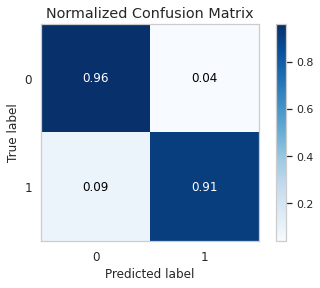

In [ ]:
# Avaliar o modelo
# Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# Classification report
print('Report do modelo de classificação:\n {}'.format(classification_report(y_test, y_pred, digits=3)))

# Acurácia
print('Acurácia do modelo: {:.2}\n'.format(accuracy_score(y_test, y_pred)))

# Curva ROC
print('AUC: {:.2}\n'.format(roc_auc_score(y_test, y_pred)))

## Conclusão

O problema em questão se trata de um desafio frequente em empresas do setor financeiro. A solução apresentada, apesar de ter levado em consideração dados já tratados, sem valores ausentes e parcialmente normalizados, demandou a realização de balanceamento, padronizações e outros tratamentos para adequação ao modelo de machine learning executado.

O resultado encontrado foi satisfatório com o esperado para a apresentação do modelo de Regressão Logística utilizado. Contudo, é fáctivel a manipulação de diferentes parâmetros no modelo constatado, como também, pode-se implementar outros modelos de classificação a fim de comparar e encontrar uma melhor eficácia nos valores finais. 